In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
df = pd.read_csv('global superstore.csv')
df.drop_duplicates(inplace=True)
df

,Order ID,Order Date,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,West,Furniture,Bookcases,261.96,2,0.0,41.91
1,US-2017-108966,2017-06-12,East,Office Supplies,Labels,14.62,2,0.0,6.87
2,CA-2018-115812,2018-10-11,Central,Technology,Phones,957.58,5,0.2,90.57
3,US-2019-147152,2019-09-14,South,Furniture,Chairs,731.94,3,0.1,140.54
4,CA-2020-167290,2020-01-10,West,Technology,Accessories,22.37,2,0.0,2.52


In [11]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Order ID        0
Order Date      0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [12]:
numeric_cols = ['Sales', 'Profit']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 2B. Statistical Analysis

# Summary statistics
print("\nStatistical Summary:\n", df[numeric_cols].agg(['mean', 'median', 'std', 'var']))

# Correlation matrix
correlation = df[numeric_cols].corr()
print("\nCorrelation Matrix:\n", correlation)


Statistical Summary:
                 Sales       Profit
mean       397.694000    56.482000
median     261.960000    41.910000
std        427.560006    58.765062
var     182807.558680  3453.332570

Correlation Matrix:
            Sales    Profit
Sales   1.000000  0.879757
Profit  0.879757  1.000000


In [13]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

Text(0.5, 1.0, 'Sales Distribution')

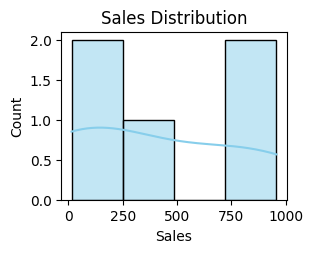

In [14]:
plt.subplot(2, 2, 1)
sns.histplot(df['Sales'], kde=True, color='skyblue')
plt.title('Sales Distribution')


Text(0.5, 1.0, 'Profit Distribution')

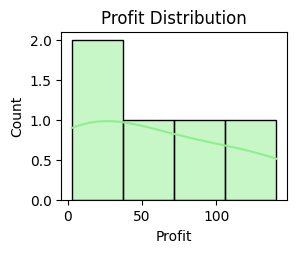

In [15]:
plt.subplot(2, 2, 2)
sns.histplot(df['Profit'], kde=True, color='lightgreen')
plt.title('Profit Distribution')

Text(0.5, 1.0, 'Boxplot of Sales and Profit')

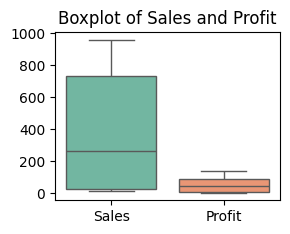

In [16]:
plt.subplot(2, 2, 3)
sns.boxplot(data=df[numeric_cols], palette='Set2')
plt.title('Boxplot of Sales and Profit')

Text(0.5, 1.0, 'Correlation Heatmap')

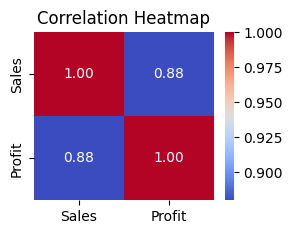

In [17]:
plt.subplot(2, 2, 4)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')


In [18]:

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>